In [1]:
# Import the libraries.

# Import pandas.
import pandas as pd
# Import numpy.
import numpy as np
# Import matplotlib.
import matplotlib.pyplot as plt
# Import seaborn.
import seaborn as sns
# Import regular expression.
import re
# import datetime.
import datetime as dt
# Import the data.

In [2]:
weather_df = pd.read_csv('input/weather.csv')
print('\nNumber of rows and columns in the data set: ',weather_df.shape)
print('')

#Lets look into top few rows and columns in the dataset
weather_df.head()


Number of rows and columns in the data set:  (14001, 21)



,SEASON,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,...,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_DP,NEWDELHI_GRADE,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR
0,2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,8
1,2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,8
2,2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,3
3,2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,0
4,2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,41.300746,...,40.558118,991.873412,991.873412,CS,UNK,43.471802,989.403054,21.626368,7,358


In [3]:
weather_df['ISO_TIME'] = pd.to_datetime(weather_df['ISO_TIME'], errors='coerce')

In [4]:
weather_df['Year'] = weather_df['ISO_TIME'].dt.year
weather_df['Month'] = weather_df['ISO_TIME'].dt.month
weather_df['Day'] = weather_df['ISO_TIME'].dt.day
weather_df['hour'] = weather_df['ISO_TIME'].dt.hour
weather_df['time'] = weather_df['ISO_TIME'].dt.time

In [5]:
weather_df.head()

,SEASON,BASIN,SUBBASIN,NAME,ISO_TIME,LAT,LON,DIST2LAND,LANDFALL,WMO_WIND,...,REUNION_WIND,REUNION_PRES,REUNION_RMW,STORM_SPEED,STORM_DIR,Year,Month,Day,hour,time
0,2015,NI,AS,ASHOBAA,2015-06-06 06:00:00,13.10,68.5000,624,601.0,41.300746,...,43.471802,989.403054,21.626368,7,8,2015,6,6,6,06:00:00
1,2015,NI,AS,ASHOBAA,2015-06-06 09:00:00,13.45,68.5599,597,584.0,41.300746,...,43.471802,989.403054,21.626368,7,8,2015,6,6,9,09:00:00
2,2015,NI,AS,ASHOBAA,2015-06-06 12:00:00,13.80,68.6000,584,571.0,41.300746,...,43.471802,989.403054,21.626368,7,3,2015,6,6,12,12:00:00
3,2015,NI,AS,ASHOBAA,2015-06-06 15:00:00,14.15,68.6075,566,551.0,41.300746,...,43.471802,989.403054,21.626368,7,0,2015,6,6,15,15:00:00
4,2015,NI,AS,ASHOBAA,2015-06-06 18:00:00,14.50,68.6000,551,538.0,41.300746,...,43.471802,989.403054,21.626368,7,358,2015,6,6,18,18:00:00


#### Top ten cyclones which occured the maximum number in BASIN.

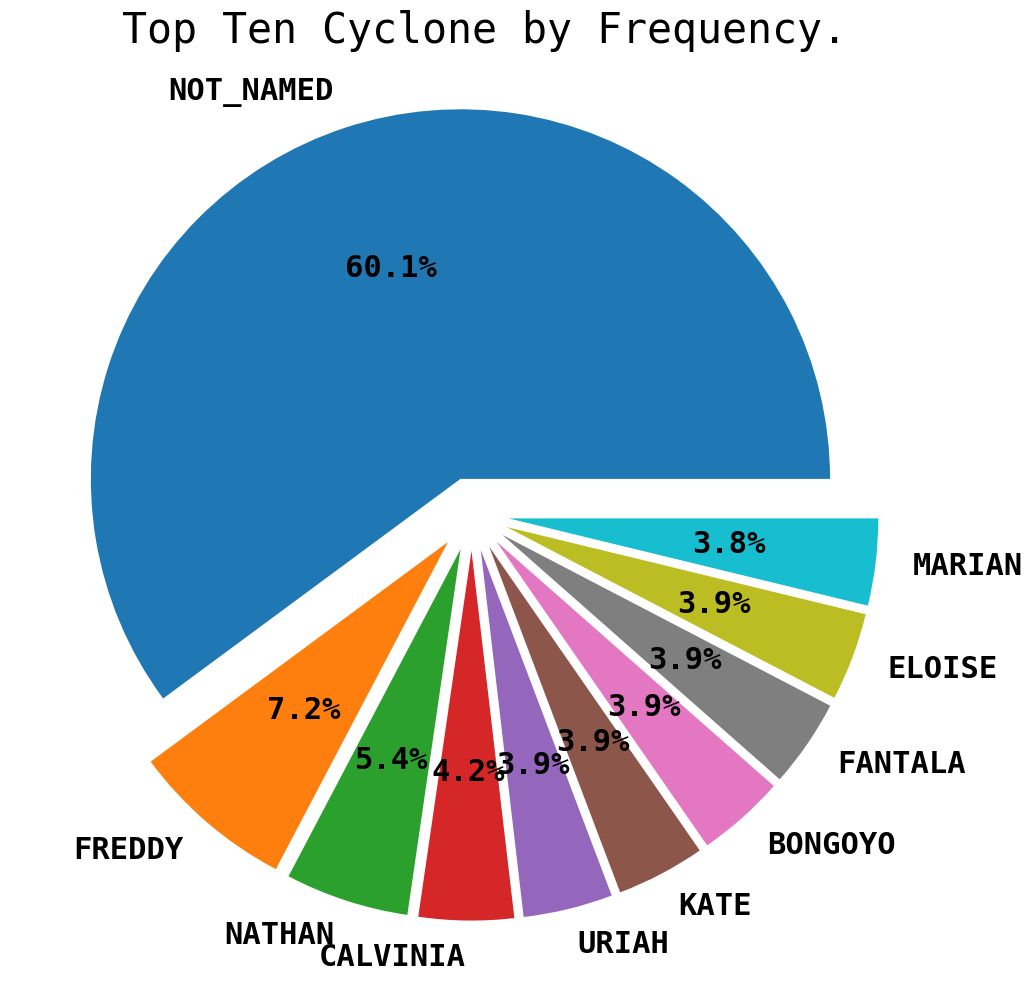

In [6]:
# Find the top ten cyclones which have occured the maximum number of times.
lst = [x.strip() for x in weather_df.groupby('NAME').count().sort_values(by = 'ISO_TIME' , ascending = False).index[:10]]
val = weather_df.groupby('NAME').count().sort_values(by = 'ISO_TIME' , ascending = False)[:10]['ISO_TIME'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.1 for x in range(10)])
plt.title(' Top Ten Cyclone by Frequency.' , fontsize = 30)
plt.show()

#### Frequency of Cyclone by Month

Text(0.5, 1.0, 'Frequency of Cyclones by Month.')

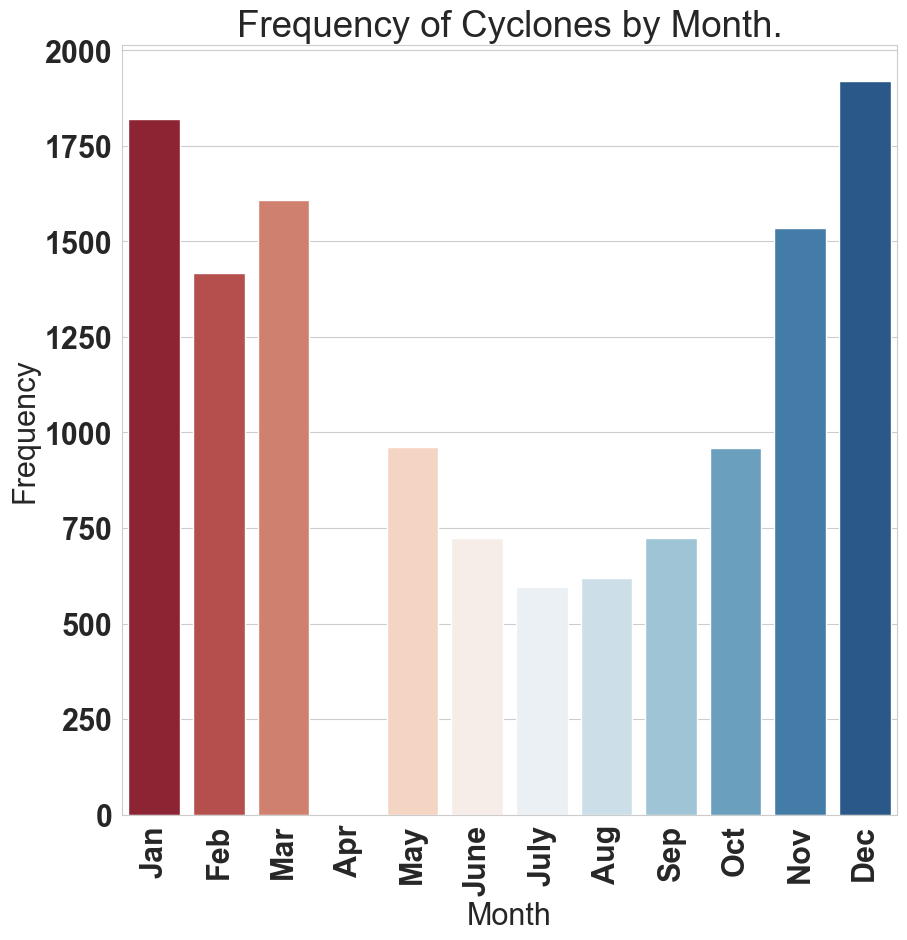

In [7]:

mnt = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'June' , 'July' , 'Aug' , 'Sep','Oct' , 'Nov' , 'Dec']
temp = weather_df.groupby('Month').count()
temp.loc[4] = 0
temp = temp.sort_values(by = 'Month' , ascending = False)
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize = (10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x = temp.index , y = 'ISO_TIME' , data=temp , palette = 'RdBu' )
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11] , mnt , rotation = 90)
plt.ylabel('Frequency')
plt.title('Frequency of Cyclones by Month.')

#### Year Wise Frequency of NI vs SI

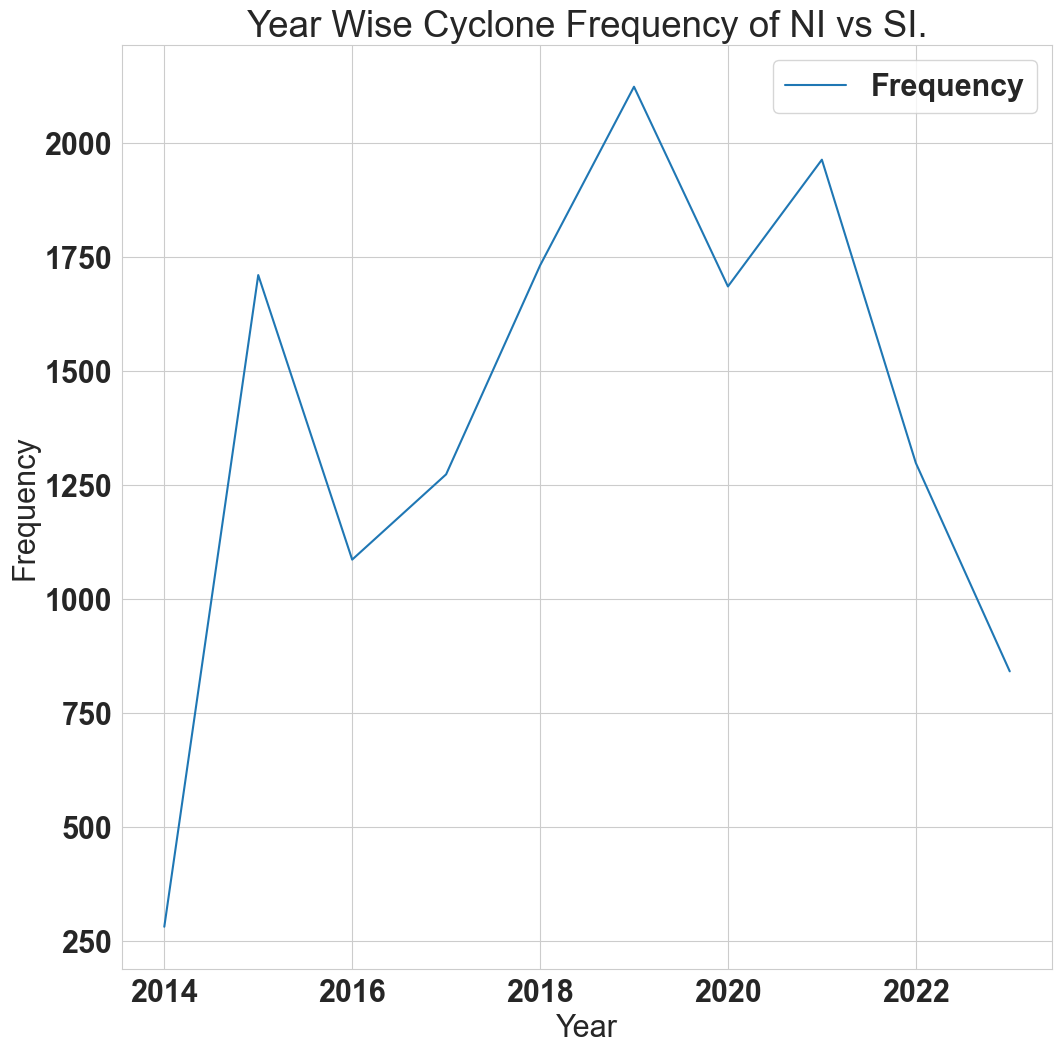

In [64]:
temp = weather_df.groupby('Year').count().sort_values(by = 'Month' , ascending = False)
plt.figure(figsize= (12,12))
sns.lineplot(x = temp.index , y = 'Month' , data = temp , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Cyclone Frequency of NI vs SI.')
plt.show()

c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\anaconda3\envs\DataScience\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

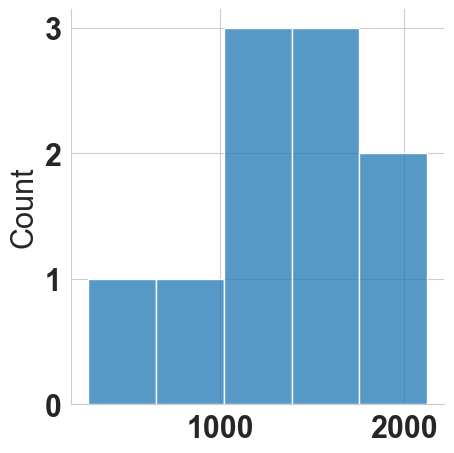

In [9]:
# Probability Distribution Function of Frequency.
temp = weather_df.groupby('Year').count().sort_values(by = 'ISO_TIME' , ascending = False)
plt.figure(figsize=(15,15))
sns.displot(temp['ISO_TIME'].values , hue_norm = True, ax = 'Probability Distribution of Frequency of Cyclones.')

#### Frequency of Cyclones by category.

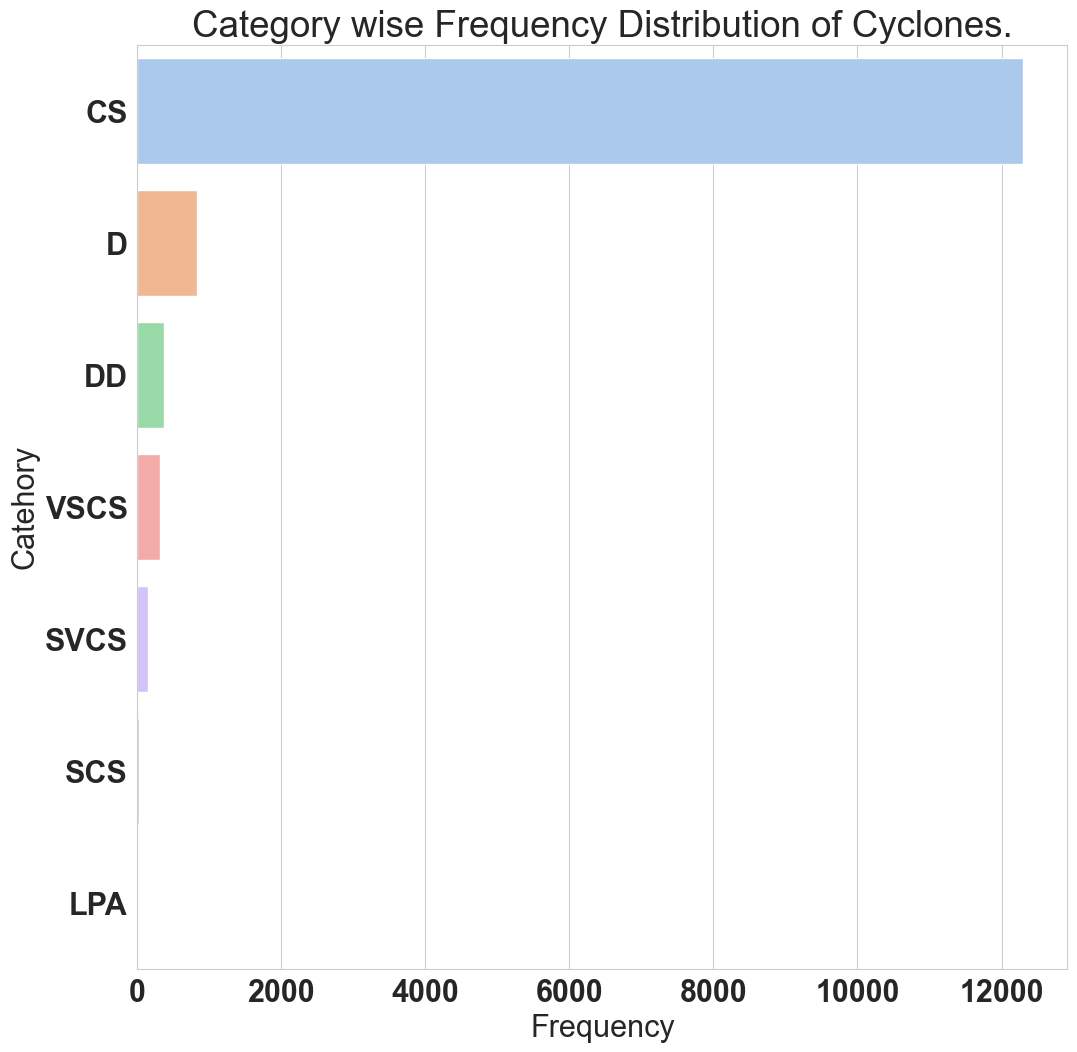

In [10]:
temp = weather_df.groupby('NEWDELHI_GRADE').count().sort_values(by = 'ISO_TIME' , ascending = False)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
sns.barplot(y = list(temp.index) , x = 'ISO_TIME' , data = temp, palette= 'pastel' )
plt.xlabel('Frequency')
plt.ylabel('Catehory')
plt.title('Category wise Frequency Distribution of Cyclones.')
plt.show()

## 1. Decision Tree

In [29]:
# Import Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier

# Import train-test split.
from sklearn.model_selection import train_test_split

# Import accuracy Score.
from sklearn.metrics import accuracy_score

#Import Recall Score.
from sklearn.metrics import recall_score 

#Import Precision Score.
from sklearn.metrics import precision_score 

# Form the model.
dt = DecisionTreeClassifier(min_samples_leaf=50 , criterion='entropy')

# Set the dependent and independent variables.
x_train = weather_df[['LAT', 'LON','WMO_WIND', 'WMO_PRES', 'DIST2LAND',
       'LANDFALL', 'NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP',
        'REUNION_WIND', 'REUNION_PRES', 'REUNION_RMW', 'STORM_SPEED', 'STORM_DIR',
        'Month' , 'Year']]
y_train = weather_df['NEWDELHI_GRADE']

In [30]:
# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

In [31]:
dt_scores = []
dt_recall_scores = []
dt_precision_scores = []

In [32]:
for tr , ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))

c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification

In [33]:
dt_scr = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9981430100948302
Recall score for Decision Tree is : 0.9981430100948302
Precision score for Decision Tree is : 0.9964305308968688


#### Random Forest.

In [34]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# First I want to determine the important features.
rf = RandomForestClassifier(oob_score=True , n_estimators=1000)
rf.fit(x_train , y_train)
features = pd.Series(rf.feature_importances_ , index= x_train.columns).sort_values(ascending=False)
features

NEWDELHI_WIND    0.440234
NEWDELHI_PRES    0.154261
NEWDELHI_DP      0.146697
WMO_WIND         0.107014
LAT              0.074138
WMO_PRES         0.030516
Month            0.010373
DIST2LAND        0.008608
LON              0.008341
STORM_DIR        0.005586
LANDFALL         0.005467
Year             0.004055
STORM_SPEED      0.002358
REUNION_WIND     0.001430
REUNION_PRES     0.000816
REUNION_RMW      0.000107
dtype: float64

###  decision tree for top ten most important features

In [35]:
# Top ten most important features.
features.index[:5]

Index(['NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'WMO_WIND', 'LAT'], dtype='object')

In [36]:
# Set the dependent and independent variables.
x_trainf = weather_df[features.index[:5]]
y_train = weather_df['NEWDELHI_GRADE']

In [37]:
# Perform the Kfold validation.

# Import the KFold library.
from sklearn.model_selection import KFold
kf = KFold(n_splits=10 , shuffle= True , random_state=42 )

In [38]:
dt_scores = []
dt_recall_scores = []
dt_precision_scores = []

In [39]:
for tr , ts in kf.split(x_trainf):
    xtr = x_trainf.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_trainf.loc[ts]
    yts = y_train.loc[ts]
    dt.fit(xtr , ytr)
    y_pred = dt.predict(xts) 
    dt_scores.append(accuracy_score(yts, y_pred)) 
    dt_recall_scores.append(recall_score(yts , y_pred , average = 'weighted'))
    dt_precision_scores.append(precision_score(yts , y_pred , average = 'weighted'))

c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification

In [40]:
dt_scr5 = {'accuracy' : np.mean(dt_scores) , 'recall': np.mean(dt_recall_scores) , 'precision' :  np.mean(dt_precision_scores) }
print('Accuracy score for Decision Tree is :' , dt_scr['accuracy'])
print('Recall score for Decision Tree is :' , dt_scr['recall'])
print('Precision score for Decision Tree is :' , dt_scr['precision'])

Accuracy score for Decision Tree is : 0.9981430100948302
Recall score for Decision Tree is : 0.9981430100948302
Precision score for Decision Tree is : 0.9964305308968688


## 2 . Random Forest

In [41]:
# Here instead of cross validation we will be using oob score as a measure of accuracy.
# I will hyper tuning the parameter: No of Trees.

trees  = [10, 20 , 50, 100,200,500,1000,1200]
maxn_five = {}
maxn = {}
for i in trees:
    rf = RandomForestClassifier(n_estimators=i , oob_score=True)
    rf.fit(x_trainf , y_train)
    print('Obb Score for {x} trees: and taking top five features '.format(x = i) , rf.oob_score_)
    maxn_five[i] = rf.oob_score_
    rf.fit(x_trainf , y_train)
    print('Obb Score for {x} trees: and taking all the features '.format(x = i) , rf.oob_score_)
    maxn[i] = rf.oob_score_

c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 10 trees: and taking top five features  0.998214413256196
Obb Score for 10 trees: and taking all the features  0.9979287193771873
Obb Score for 20 trees: and taking top five features  0.9999285765302478


c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Obb Score for 20 trees: and taking all the features  0.9999285765302478
Obb Score for 50 trees: and taking top five features  0.9999285765302478
Obb Score for 50 trees: and taking all the features  0.9999285765302478
Obb Score for 100 trees: and taking top five features  0.9999285765302478
Obb Score for 100 trees: and taking all the features  0.9999285765302478
Obb Score for 200 trees: and taking top five features  0.9999285765302478
Obb Score for 200 trees: and taking all the features  0.9999285765302478
Obb Score for 500 trees: and taking top five features  0.9999285765302478
Obb Score for 500 trees: and taking all the features  0.9999285765302478
Obb Score for 1000 trees: and taking top five features  0.9999285765302478
Obb Score for 1000 trees: and taking all the features  0.9999285765302478
Obb Score for 1200 trees: and taking top five features  0.9999285765302478
Obb Score for 1200 trees: and taking all the features  0.9999285765302478


In [43]:
# Split the data into training and testing.
x_trains , x_tests , y_trains, y_tests  = train_test_split(x_trainf, y_train, test_size=0.33, random_state=42)
# Set n to the feature of maximum oob score.
n = 0
for i in maxn_five:
    if max(maxn_five.values()) == maxn_five[i]:
        n= i
# Set n_estimators to n.
rf = RandomForestClassifier(oob_score=True , n_estimators=n)
rf.fit(x_trains , y_trains)
y_pred_rf = rf.predict(x_tests[features.index[:5]])
scores_rf = {'accuracy': accuracy_score(y_tests , y_pred_rf) ,'recall' : recall_score(y_tests , y_pred_rf , average='weighted') ,'precision' : precision_score(y_tests , y_pred_rf , average='weighted') }
print('Scores for Random Forest with n = ' , n , ' and using features ',  features.index[:5] , ' are : ')
print('Accuracy: ' , scores_rf['accuracy'])
print('Recall: ' , scores_rf['recall'])
print('Precision: ' , scores_rf['precision'])

Scores for Random Forest with n =  1200  and using features  Index(['NEWDELHI_WIND', 'NEWDELHI_PRES', 'NEWDELHI_DP', 'WMO_WIND', 'LAT'], dtype='object')  are : 
Accuracy:  1.0
Recall:  1.0
Precision:  1.0


## 3. Naive Bayes Algorithm.

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb5 = GaussianNB()
acc_s = [] 
rcl_s = [] 
ps_scr = []
acc_s_5 = [] 
rcl_s_5 = [] 
ps_scr_5 = []
for tr, ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    xtr5 = x_trainf.loc[tr]
    xts5 = x_trainf.loc[ts]

    
    # Accuracy , Precision and recall with all features.
   
    nb.fit(xtr , ytr)
    y_nb_pred = nb.predict(xts)
    acc_s.append(accuracy_score(yts , y_nb_pred))
    rcl_s.append(recall_score(yts , y_nb_pred , average = 'weighted'))
    ps_scr.append(precision_score(yts , y_nb_pred , average = 'weighted'))
    
#     Accuracy , Precision and recall with top five features.
    nb5.fit(xtr5 , ytr)
    y_nb5_pred = nb5.predict(xts5)
    acc_s_5.append(accuracy_score(yts , y_nb5_pred))
    rcl_s_5.append(recall_score(yts , y_nb5_pred , average = 'weighted'))
    ps_scr_5.append(precision_score(yts , y_nb5_pred , average = 'weighted'))
    
nb_scores = {'accuracy':np.mean(acc_s) , 'recall':np.mean(rcl_s) , 'precision':np.mean(ps_scr)}
nb5_scores = {'accuracy':np.mean(acc_s_5) , 'recall':np.mean(rcl_s_5) , 'precision':np.mean(ps_scr_5)}
print('Naive Bayes results for top five features for Accuracy ' , nb5_scores['accuracy'] , 'Recall: ' , nb5_scores['recall'], 'and Precision: ' , nb5_scores['precision'] )
print('Naive Bayes results for all features for Accuracy ' , nb_scores['accuracy'] , 'Recall: ' , nb_scores['recall'], 'and Precision: ' , nb_scores['precision'] )

c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes results for top five features for Accuracy  0.972144692566534 Recall:  0.972144692566534 and Precision:  0.9809817049038635
Naive Bayes results for all features for Accuracy  0.9281477006220047 Recall:  0.9281477006220047 and Precision:  0.9769266195354559


## 4. Logistic Alogthrim

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [47]:
x_trains , x_tests , y_trains, y_tests  = train_test_split(x_trainf, y_train, test_size=0.2, random_state=42)
y_pred_proba = []
fprate = []
tprate = []
thresholds = []
acc_cy = []
for tr, ts in kf.split(x_train):
    xtr = x_train.loc[tr]
    ytr = y_train.loc[tr]
    xts = x_train.loc[ts]
    yts = y_train.loc[ts]
    xtr5 = x_trainf.loc[tr]
    xts5 = x_trainf.loc[ts]

# Train the Logistic Regression model
lg_reg = LogisticRegression()
lg_reg.fit(xtr, ytr)



c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# Evaluate the model
y_log_pred = lg_reg.predict(xts)
# y_pred_proba.append(lg_reg.predict_proba(xts)[:, 1])
# fprate.append(roc_curve(yts, y_log_pred, pos_label=1))
# tprate.append(roc_curve(yts, y_log_pred, pos_label=1))
# thresholds.append(roc_curve(yts, y_log_pred, pos_label=1))
# acc_cy.append(yts, y_log_pred)

lg_scores = {'accuracy': accuracy_score(yts, y_log_pred)}
print(lg_reg.__class__.__name__+" accuracy is %2.5f" % lg_scores['accuracy'])
print("Confusion Matrix:\n", confusion_matrix(yts, y_pred))
print("\nClassification Report:\n", classification_report(yts, y_pred))

LogisticRegression accuracy is 0.93500
Confusion Matrix:
 [[1239    0    0    0    0    0]
 [   0   79    0    0    0    0]
 [   0    0   28    0    0    0]
 [   0    0    0    0    0    3]
 [   0    0    0    0    9    0]
 [   0    0    0    0    0   42]]

Classification Report:
               precision    recall  f1-score   support

          CS       1.00      1.00      1.00      1239
           D       1.00      1.00      1.00        79
          DD       1.00      1.00      1.00        28
         SCS       0.00      0.00      0.00         3
        SVCS       1.00      1.00      1.00         9
        VSCS       0.93      1.00      0.97        42

    accuracy                           1.00      1400
   macro avg       0.82      0.83      0.83      1400
weighted avg       1.00      1.00      1.00      1400



c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\DataScience\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


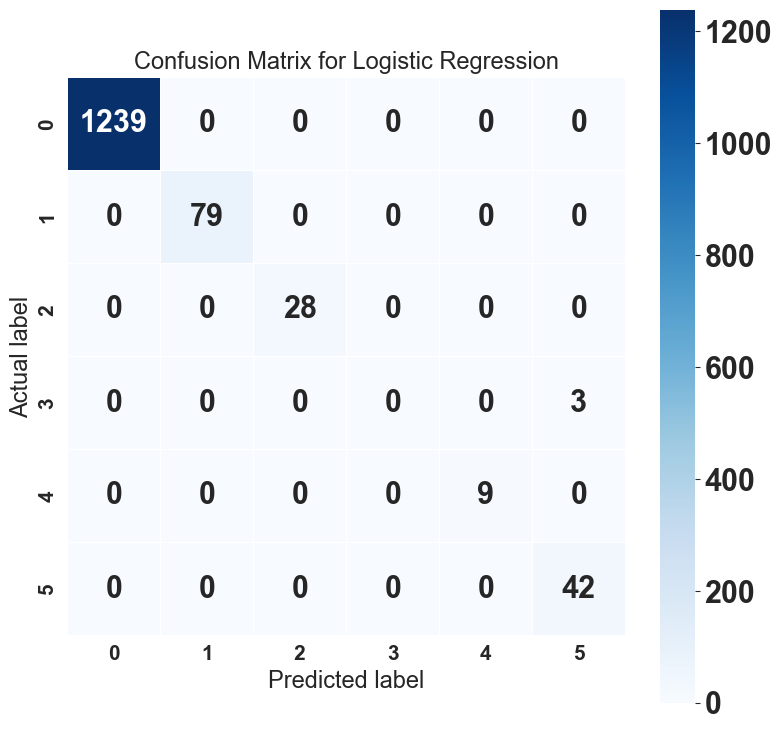

In [60]:
lscore = lg_reg.score(xts, yts)
cm = confusion_matrix(yts, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Confusion Matrix for Logistic Regression'.format(lscore), size = 17);
plt.tick_params(labelsize= 15)

## 5. Support Vector Algorithm

In [61]:
# Import SVM.
from sklearn import svm
mdl5 = svm.SVC()
acc_s_5 = [] 
rcl_s_5 = [] 
ps_scr_5 = []

# Split the data into train and test.
xtr5, xts5 , ytr , yts = train_test_split(x_trainf , y_train , test_size = 0.25 , random_state = 42)

# Train the model.
mdl5.fit(xtr5 , ytr)
y_mdl5_pred = nb5.predict(xts5)
acc_s_5.append(accuracy_score(yts , y_mdl5_pred))
rcl_s_5.append(recall_score(yts , y_mdl5_pred , average = 'weighted'))
ps_scr_5.append(precision_score(yts , y_mdl5_pred , average = 'weighted'))


svm_scores = {'accuracy':np.mean(acc_s_5) , 'recall':np.mean(rcl_s_5) , 'precision':np.mean(ps_scr_5)}
print('SVM results for top five features for Accuracy ' , svm_scores['accuracy'] , 'Recall: ' , svm_scores['recall'], 'and Precision: ' , svm_scores['precision'] )

SVM results for top five features for Accuracy  0.9754355898314767 Recall:  0.9754355898314767 and Precision:  0.9837165761588925


## Compare Algothrims

In [62]:
## Comparing the algorithms.
res = {'DecisionTree':dt_scr5['accuracy'] , 'RandomForest': scores_rf['accuracy'] , 'GaussianNB': nb5_scores['accuracy'] , 
       'SVM':svm_scores['accuracy'], 'Logistic Regression': lg_scores['accuracy']}
max_res = max(res.values())
max_index = ''
for i in res:
    if res[i] == max_res:
        max_index = i
print('The most effictive algorithm is :' , max_index , 'with accuracy: ' , res[max_index])    

The most effictive algorithm is : RandomForest with accuracy:  1.0
